In [19]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from linearmodels import PanelOLS
from sklearn.linear_model import LinearRegression

In [20]:
data = pd.read_csv("Data/master_data_es.csv")
data.drop(columns=["Unnamed: 0"], inplace=True)
data = data.dropna()

In [21]:
#sum stats
sum_stats = data[['price', 'vol', 'return', 'share_passive', '3day_vol', '5day_vol', '30day_vol']].describe()
sum_stats

,price,vol,return,share_passive,3day_vol,5day_vol,30day_vol
count,359888.000000,3.598880e+05,359888.000000,359888.000000,359888.000000,359888.000000,359888.000000
mean,57.856717,2.076198e+06,-0.000767,0.133600,1.771442,2.963891,17.563011
std,168.324781,9.685565e+06,0.046688,0.119375,5.992165,9.377905,53.071114
min,0.020100,0.000000e+00,-0.804171,0.000005,0.000000,0.000000,0.030355
25%,7.110000,1.442000e+05,-0.018239,0.031006,0.199750,0.373631,2.446089
50%,21.150000,4.875580e+05,-0.000786,0.113928,0.563205,1.007224,6.306515
75%,57.760000,1.479642e+06,0.015474,0.173327,1.551999,2.658637,16.134473
max,8382.630000,2.081916e+09,5.382716,0.939402,648.869173,795.567813,2593.489282


In [22]:
total_tickers = data['ticker'].unique().tolist()
print(len(total_tickers))

3993


In [23]:
data['passive_q'] = pd.qcut(data['share_passive'], q=4, labels=False) + 1

In [24]:
avg_3volatility = (data.groupby(['days_from_earn', 'passive_q'])['3day_vol'].mean().reset_index())

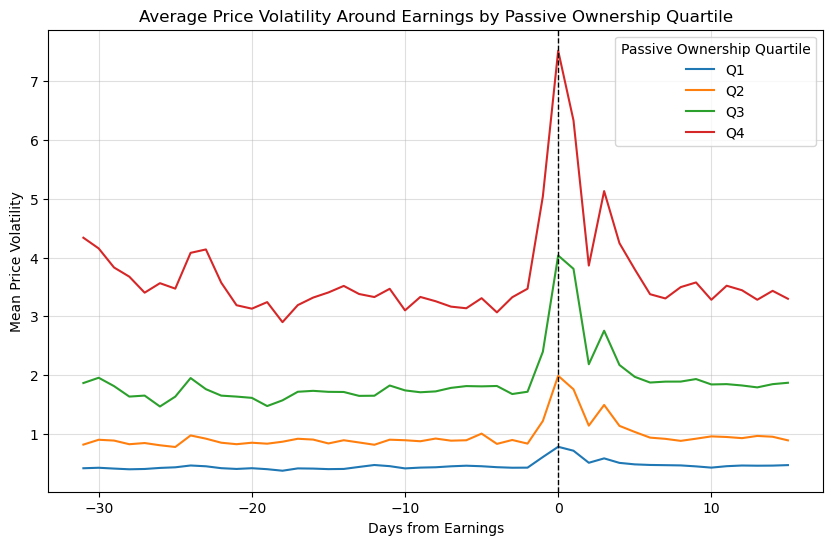

In [25]:
plt.figure(figsize=(10,6))
for q in sorted(data['passive_q'].unique()):
    subset = avg_3volatility[avg_3volatility['passive_q'] == q]
    plt.plot(subset['days_from_earn'], subset['3day_vol'], label=f'Q{q}')

plt.axvline(0, color='black', linestyle='--', linewidth=1)
plt.title('Average Price Volatility Around Earnings by Passive Ownership Quartile')
plt.xlabel('Days from Earnings')
plt.ylabel('Mean Price Volatility')
plt.legend(title='Passive Ownership Quartile')
plt.grid(True, alpha = 0.4)
plt.show()

In [26]:
avg_5volatility = (data.groupby(['days_from_earn', 'passive_q'])['5day_vol'].mean().reset_index())

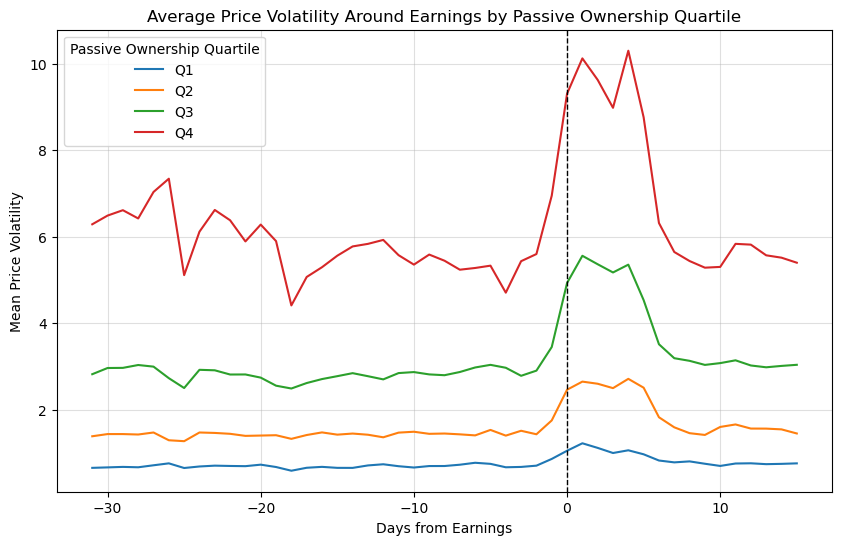

In [27]:
plt.figure(figsize=(10,6))
for q in sorted(data['passive_q'].unique()):
    subset = avg_5volatility[avg_5volatility['passive_q'] == q]
    plt.plot(subset['days_from_earn'], subset['5day_vol'], label=f'Q{q}')

plt.axvline(0, color='black', linestyle='--', linewidth=1)
plt.title('Average Price Volatility Around Earnings by Passive Ownership Quartile')
plt.xlabel('Days from Earnings')
plt.ylabel('Mean Price Volatility')
plt.legend(title='Passive Ownership Quartile')
plt.grid(True, alpha = 0.4)
plt.show()

In [28]:
avg_30volatility = (data.groupby(['days_from_earn', 'passive_q'])['30day_vol'].mean().reset_index())

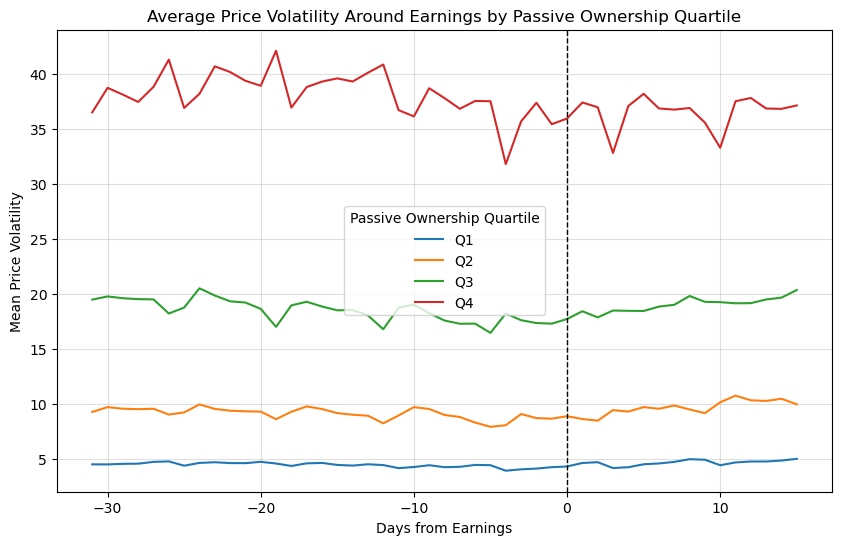

In [29]:
plt.figure(figsize=(10,6))
for q in sorted(data['passive_q'].unique()):
    subset = avg_30volatility[avg_30volatility['passive_q'] == q]
    plt.plot(subset['days_from_earn'], subset['30day_vol'], label=f'Q{q}')

plt.axvline(0, color='black', linestyle='--', linewidth=1)
plt.title('Average Price Volatility Around Earnings by Passive Ownership Quartile')
plt.xlabel('Days from Earnings')
plt.ylabel('Mean Price Volatility')
plt.legend(title='Passive Ownership Quartile')
plt.grid(True, alpha = 0.4)
plt.show()

In [30]:
def event_study(data, level, cov, entity_fe = False, time_fe = False, cluster = False):
    if level == 3:
        for k in range(-29, 16):
            data[f'day_{k}'] = (data['days_from_earn'] == k).astype(int)
        data['Date'] = pd.to_datetime(data['Date'])
        df = data.set_index(['ticker', 'Date'])
        event_dummies = [f'day_{k}' for k in range(-29, 16) if k != -1]
        for k in range(-29, 16):
            if k != -1:
                df[f'day_{k}_passive'] = df[f'day_{k}'] * df['share_passive']
            
        X = df[event_dummies + [f'{d}_passive' for d in event_dummies]]
        Y = df['3day_vol']
        model = PanelOLS(Y, X, entity_effects=entity_fe, time_effects=time_fe)
        res = model.fit(cov_type=cov, cluster_entity = cluster)
        return res
    elif level == 5:
        for k in range(-29, 16):
            data[f'day_{k}'] = (data['days_from_earn'] == k).astype(int)
        data['Date'] = pd.to_datetime(data['Date'])
        df = data.set_index(['ticker', 'Date'])
        event_dummies = [f'day_{k}' for k in range(-29, 16) if k != -1]
        for k in range(-29, 16):
            if k != -1:
                df[f'day_{k}_passive'] = df[f'day_{k}'] * df['share_passive']
            
        X = df[event_dummies + [f'{d}_passive' for d in event_dummies]]
        Y = df['5day_vol']
        model = PanelOLS(Y, X, entity_effects=entity_fe, time_effects=time_fe)
        res = model.fit(cov_type=cov, cluster_entity = cluster)
        return res
    elif level == 30:
        for k in range(-29, 16):
            data[f'day_{k}'] = (data['days_from_earn'] == k).astype(int)
        data['Date'] = pd.to_datetime(data['Date'])
        df = data.set_index(['ticker', 'Date'])
        event_dummies = [f'day_{k}' for k in range(-29, 16) if k != -1]
        for k in range(-29, 16):
            if k != -1:
                df[f'day_{k}_passive'] = df[f'day_{k}'] * df['share_passive']
            
        X = df[event_dummies + [f'{d}_passive' for d in event_dummies]]
        Y = df['30day_vol']
        model = PanelOLS(Y, X, entity_effects=entity_fe, time_effects=time_fe)
        res = model.fit(cov_type=cov, cluster_entity = cluster)
        return res

In [31]:
res = event_study(data, 3, 'clustered', True, False, True)
print(res.summary)

                          PanelOLS Estimation Summary                           
Dep. Variable:               3day_vol   R-squared:                        0.0147
Estimator:                   PanelOLS   R-squared (Between):             -0.0336
No. Observations:              359888   R-squared (Within):               0.0147
Date:                Fri, Oct 31 2025   R-squared (Overall):             -0.0104
Time:                        14:33:28   Log-likelihood                -1.027e+06
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      60.279
Entities:                        3993   P-value                           0.0000
Avg Obs:                       90.130   Distribution:               F(88,355807)
Min Obs:                       2.0000                                           
Max Obs:                       136.00   F-statistic (robust):             11.726
                            

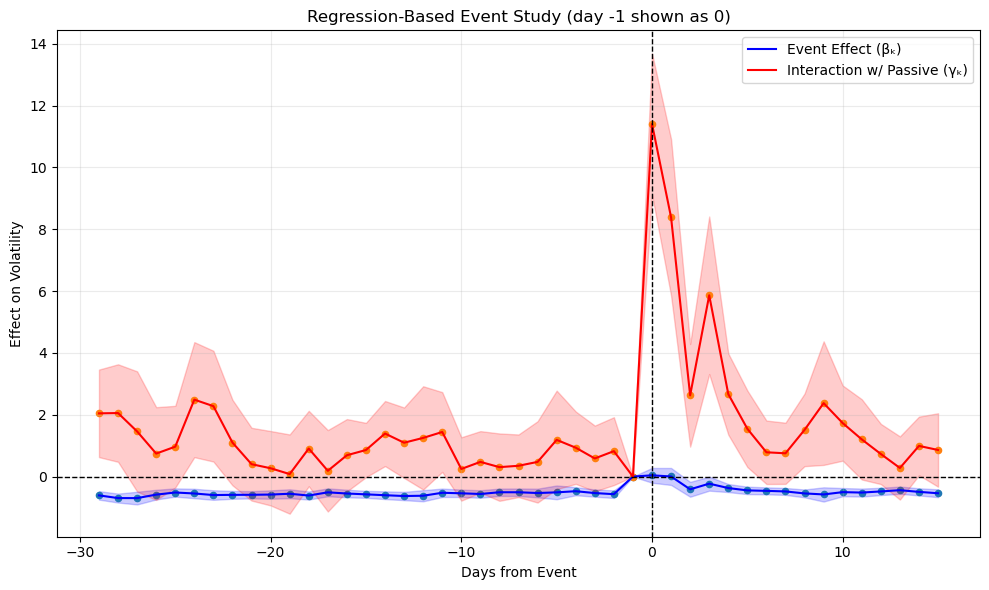

In [32]:
days = list(range(-29, 16))

def get_coef(key):
    return float(res.params.get(key, 0.0))

def get_se(key):
    return float(res.std_errors.get(key, 0.0))

# Build arrays for betas and gammas, with explicit 0 at day -1
betas = []
beta_se = []
gammas = []
gamma_se = []

for k in days:
    if k == -1:
        # omitted baseline: coefficient = 0, se = 0
        betas.append(0.0)
        beta_se.append(0.0)
        gammas.append(0.0)
        gamma_se.append(0.0)
    else:
        betas.append(get_coef(f'day_{k}'))
        beta_se.append(get_se(f'day_{k}'))
        gammas.append(get_coef(f'day_{k}_passive'))
        gamma_se.append(get_se(f'day_{k}_passive'))

betas = np.array(betas)
beta_se = np.array(beta_se)
gammas = np.array(gammas)
gamma_se = np.array(gamma_se)

# 95% CI bounds
beta_lower = betas - 1.96 * beta_se
beta_upper = betas + 1.96 * beta_se
gamma_lower = gammas - 1.96 * gamma_se
gamma_upper = gammas + 1.96 * gamma_se

# Plot: lines + shaded 95% CI + dots
plt.figure(figsize=(10,6))

# βk
plt.plot(days, betas, label='Event Effect (βₖ)', linewidth=1.5, color='blue')
plt.fill_between(days, beta_lower, beta_upper, alpha=0.2, color='blue')
plt.scatter(days, betas, s=20)

# γk
plt.plot(days, gammas, label='Interaction w/ Passive (γₖ)', linewidth=1.5, color='red')
plt.fill_between(days, gamma_lower, gamma_upper, alpha=0.2, color='red')
plt.scatter(days, gammas, s=20)

# Reference lines
plt.axvline(0, color='black', linestyle='--', linewidth=1)
plt.axhline(0, color='black', linestyle='--', linewidth=1)

plt.xlabel('Days from Event')
plt.ylabel('Effect on Volatility')
plt.title('Regression-Based Event Study (day -1 shown as 0)')
plt.legend()
plt.grid(alpha=0.25)
plt.tight_layout()
plt.show()

In [33]:
res = event_study(data, 5, 'clustered', True, False, True)
print(res.summary)

                          PanelOLS Estimation Summary                           
Dep. Variable:               5day_vol   R-squared:                        0.0161
Estimator:                   PanelOLS   R-squared (Between):              0.0211
No. Observations:              359888   R-squared (Within):               0.0161
Date:                Fri, Oct 31 2025   R-squared (Overall):              0.0192
Time:                        14:33:48   Log-likelihood                -1.157e+06
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      66.262
Entities:                        3993   P-value                           0.0000
Avg Obs:                       90.130   Distribution:               F(88,355807)
Min Obs:                       2.0000                                           
Max Obs:                       136.00   F-statistic (robust):             11.419
                            

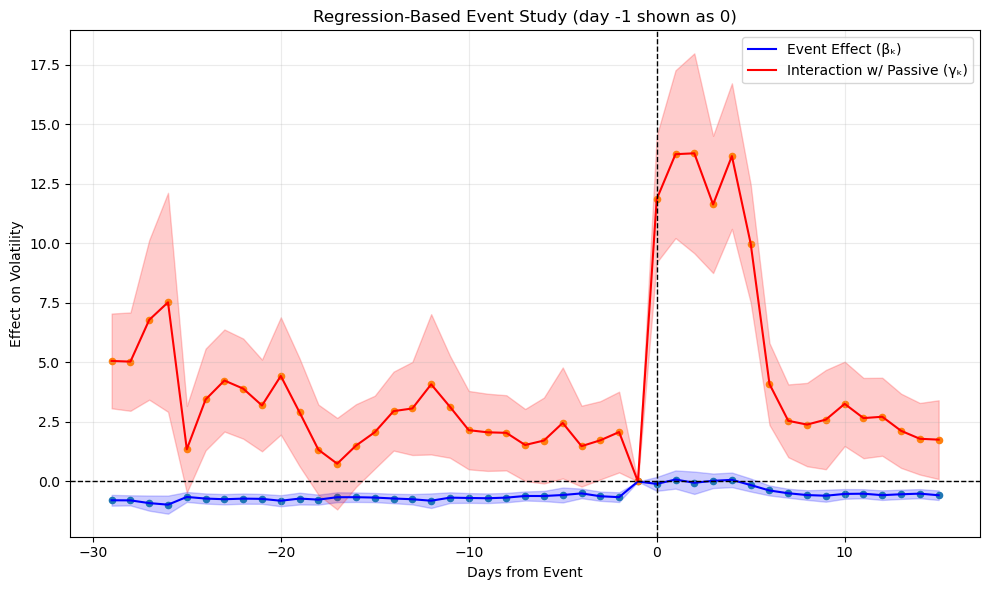

In [34]:
days = list(range(-29, 16))

def get_coef(key):
    return float(res.params.get(key, 0.0))

def get_se(key):
    return float(res.std_errors.get(key, 0.0))

# Build arrays for betas and gammas, with explicit 0 at day -1
betas = []
beta_se = []
gammas = []
gamma_se = []

for k in days:
    if k == -1:
        # omitted baseline: coefficient = 0, se = 0
        betas.append(0.0)
        beta_se.append(0.0)
        gammas.append(0.0)
        gamma_se.append(0.0)
    else:
        betas.append(get_coef(f'day_{k}'))
        beta_se.append(get_se(f'day_{k}'))
        gammas.append(get_coef(f'day_{k}_passive'))
        gamma_se.append(get_se(f'day_{k}_passive'))

betas = np.array(betas)
beta_se = np.array(beta_se)
gammas = np.array(gammas)
gamma_se = np.array(gamma_se)

# 95% CI bounds
beta_lower = betas - 1.96 * beta_se
beta_upper = betas + 1.96 * beta_se
gamma_lower = gammas - 1.96 * gamma_se
gamma_upper = gammas + 1.96 * gamma_se

# Plot: lines + shaded 95% CI + dots
plt.figure(figsize=(10,6))

# βk
plt.plot(days, betas, label='Event Effect (βₖ)', linewidth=1.5, color='blue')
plt.fill_between(days, beta_lower, beta_upper, alpha=0.2, color='blue')
plt.scatter(days, betas, s=20)

# γk
plt.plot(days, gammas, label='Interaction w/ Passive (γₖ)', linewidth=1.5, color='red')
plt.fill_between(days, gamma_lower, gamma_upper, alpha=0.2, color='red')
plt.scatter(days, gammas, s=20)

# Reference lines
plt.axvline(0, color='black', linestyle='--', linewidth=1)
plt.axhline(0, color='black', linestyle='--', linewidth=1)

plt.xlabel('Days from Event')
plt.ylabel('Effect on Volatility')
plt.title('Regression-Based Event Study (day -1 shown as 0)')
plt.legend()
plt.grid(alpha=0.25)
plt.tight_layout()
plt.show()

In [35]:
res = event_study(data, 30, 'clustered', True, False, True)
print(res.summary)

                          PanelOLS Estimation Summary                           
Dep. Variable:              30day_vol   R-squared:                        0.0024
Estimator:                   PanelOLS   R-squared (Between):              0.0347
No. Observations:              359888   R-squared (Within):               0.0024
Date:                Fri, Oct 31 2025   R-squared (Overall):              0.0257
Time:                        14:34:06   Log-likelihood                -1.721e+06
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      9.6205
Entities:                        3993   P-value                           0.0000
Avg Obs:                       90.130   Distribution:               F(88,355807)
Min Obs:                       2.0000                                           
Max Obs:                       136.00   F-statistic (robust):             4.7118
                            

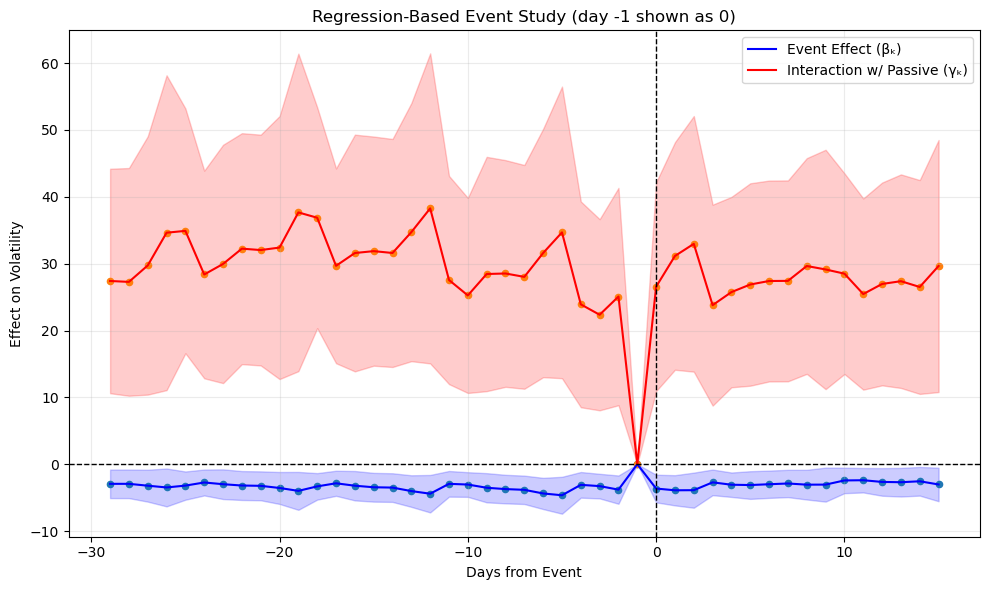

In [36]:
days = list(range(-29, 16))

def get_coef(key):
    return float(res.params.get(key, 0.0))

def get_se(key):
    return float(res.std_errors.get(key, 0.0))

# Build arrays for betas and gammas, with explicit 0 at day -1
betas = []
beta_se = []
gammas = []
gamma_se = []

for k in days:
    if k == -1:
        # omitted baseline: coefficient = 0, se = 0
        betas.append(0.0)
        beta_se.append(0.0)
        gammas.append(0.0)
        gamma_se.append(0.0)
    else:
        betas.append(get_coef(f'day_{k}'))
        beta_se.append(get_se(f'day_{k}'))
        gammas.append(get_coef(f'day_{k}_passive'))
        gamma_se.append(get_se(f'day_{k}_passive'))

betas = np.array(betas)
beta_se = np.array(beta_se)
gammas = np.array(gammas)
gamma_se = np.array(gamma_se)

# 95% CI bounds
beta_lower = betas - 1.96 * beta_se
beta_upper = betas + 1.96 * beta_se
gamma_lower = gammas - 1.96 * gamma_se
gamma_upper = gammas + 1.96 * gamma_se

# Plot: lines + shaded 95% CI + dots
plt.figure(figsize=(10,6))

# βk
plt.plot(days, betas, label='Event Effect (βₖ)', linewidth=1.5, color='blue')
plt.fill_between(days, beta_lower, beta_upper, alpha=0.2, color='blue')
plt.scatter(days, betas, s=20)

# γk
plt.plot(days, gammas, label='Interaction w/ Passive (γₖ)', linewidth=1.5, color='red')
plt.fill_between(days, gamma_lower, gamma_upper, alpha=0.2, color='red')
plt.scatter(days, gammas, s=20)

# Reference lines
plt.axvline(0, color='black', linestyle='--', linewidth=1)
plt.axhline(0, color='black', linestyle='--', linewidth=1)

plt.xlabel('Days from Event')
plt.ylabel('Effect on Volatility')
plt.title('Regression-Based Event Study (day -1 shown as 0)')
plt.legend()
plt.grid(alpha=0.25)
plt.tight_layout()
plt.show()

In [37]:
data2 = pd.read_csv('Data/master_data_pj.csv')
data2.drop(columns=["Unnamed: 0"], inplace=True)
data2 = data2.dropna()

In [38]:
data2

,Date,ticker,price,vol,return,share_passive,shares_outstanding,days_from_earn,sp_ret,earnings_date_nearest,...,sd_5day,5day_vol,sd_30day,30day_vol,abnormal_return_ar1,abnormal_return_mkt,abnormal_return_sp,PJ_ar1,PJ_mkt,PJ_sp
0,2021-11-22,A,162.78,2112504.0,-0.009251,0.332206,302723000.0,-1,-0.003197,2021-11-23,...,1.179610,2.637688,3.568226,19.543979,-0.008985,-0.002339,-0.005436,2.359205,1.130553,1.092777
1,2024-11-25,A,134.49,3355400.0,0.004857,0.298763,287328000.0,-1,0.003020,2024-11-26,...,3.723097,8.325098,4.513066,24.719082,0.005125,0.000318,0.001893,0.408361,1.553963,0.736047
2,2022-01-19,AA,59.63,7851084.0,-0.006994,0.166577,187103000.0,-1,-0.009690,2022-01-20,...,0.931622,2.083171,4.918734,26.941018,-0.007011,0.004861,0.003900,-0.883701,-0.149627,-0.186394
3,2023-01-18,AA,53.45,9115377.0,-0.025702,0.180435,176937000.0,-1,-0.015563,2023-01-19,...,1.164461,2.603815,6.855635,37.549862,-0.025505,-0.008516,-0.008403,-0.347676,-0.659675,-0.609405
4,2025-01-22,AA,38.78,9452189.0,0.004403,0.156320,258355000.0,-1,0.006138,2025-01-23,...,0.488242,1.091742,1.679577,9.199422,0.004374,-0.001150,-0.001960,14.020823,1.065196,1.191317
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11413,2025-03-05,ZYME,13.18,663069.0,0.033725,0.087000,69577000.0,-1,0.011159,2025-03-06,...,0.317994,0.711056,0.657601,3.601827,0.033891,0.020356,0.021887,0.513912,0.626836,0.626854
11414,2021-02-25,ZYXI,17.42,391666.0,-0.054289,0.158027,34849000.0,-1,-0.024479,2021-02-26,...,0.601457,1.344898,1.354830,7.420708,-0.053973,-0.023792,-0.027269,0.621562,0.730298,0.694916
11415,2022-02-24,ZYXI,6.58,590208.0,-0.012012,0.138305,38258000.0,-1,0.014957,2022-02-25,...,0.254165,0.568331,0.602101,3.297841,-0.011996,-0.031687,-0.027991,0.024362,0.152895,0.163093
11416,2023-03-13,ZYXI,10.94,543825.0,0.147954,0.131061,36634000.0,-1,-0.001510,2023-03-14,...,0.581550,1.300385,1.304231,7.143567,0.148004,0.150788,0.149929,0.128607,0.610599,0.583890


In [39]:
sum_stats2 = data2[['price', 'vol', 'return', 'share_passive', 'PJ_ar1', 'PJ_mkt', 'PJ_sp']].describe()
sum_stats2

,price,vol,return,share_passive,PJ_ar1,PJ_mkt,PJ_sp
count,11418.000000,1.141800e+04,11418.000000,11418.000000,11418.000000,11418.000000,11418.000000
mean,58.190937,3.340089e+06,-0.000368,0.134181,-0.195459,0.285036,0.819754
std,169.421943,1.123471e+07,0.069180,0.119150,32.329361,15.071781,30.710617
min,0.038800,0.000000e+00,-0.642470,0.000005,-2955.595689,-905.770415,-271.873490
25%,7.190000,2.049610e+05,-0.025957,0.031000,-0.141574,-0.125843,-0.121783
50%,21.220000,7.515670e+05,-0.000864,0.114698,0.220357,0.228495,0.227280
75%,58.170000,2.436784e+06,0.022444,0.175148,0.689894,0.715049,0.710940
max,8064.090000,4.210580e+08,1.067376,0.934326,383.103411,450.692681,2760.168175


In [40]:
data2 = data2.sort_values(['Date', 'ticker'])
data2

,Date,ticker,price,vol,return,share_passive,shares_outstanding,days_from_earn,sp_ret,earnings_date_nearest,...,sd_5day,5day_vol,sd_30day,30day_vol,abnormal_return_ar1,abnormal_return_mkt,abnormal_return_sp,PJ_ar1,PJ_mkt,PJ_sp
16,2021-02-16,AAP,155.5100,1932960.0,0.017669,0.353895,67855000.0,-1,-0.000569,2021-02-17,...,3.977973,8.895018,7.273992,39.841293,0.017742,0.019273,0.018619,0.792717,0.794165,0.800672
73,2021-02-16,ACCO,8.8300,312137.0,-0.018889,0.152580,94497000.0,-1,-0.000569,2021-02-17,...,0.206761,0.462331,0.303762,1.663772,-0.018765,-0.017285,-0.017939,0.756571,0.744418,0.735623
325,2021-02-16,AIG,42.1500,4937302.0,0.018116,0.354337,861526000.0,-1,-0.000569,2021-02-17,...,0.427586,0.956112,1.685415,9.231399,0.018237,0.019720,0.019066,0.387710,0.486317,0.500440
435,2021-02-16,ALLE,109.8100,1336388.0,-0.071453,0.370661,92039000.0,-1,-0.000569,2021-02-17,...,3.761884,8.411828,3.554201,19.467159,-0.071351,-0.069849,-0.070503,0.089198,-0.014044,-0.020226
601,2021-02-16,AN,79.4300,1129794.0,0.013267,0.220437,87865000.0,-1,-0.000569,2021-02-17,...,0.509873,1.140110,2.754835,15.088852,0.013446,0.014871,0.014217,-1.527535,-0.057743,-0.027574
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10456,2025-03-27,UMAC,7.1900,592165.0,0.036023,0.016694,15122000.0,-1,-0.003307,2025-03-28,...,0.269128,0.601789,1.985749,10.876393,0.035858,0.040358,0.039958,0.641675,1.547096,1.621280
10682,2025-03-27,VINC,0.5666,316969.0,-0.059741,0.009000,5234000.0,-1,-0.003307,2025-03-28,...,0.035479,0.079333,0.253713,1.389645,-0.059267,-0.055406,-0.055806,0.077328,0.049019,0.048632
10877,2025-03-27,VTSI,5.1650,98462.0,-0.025472,0.065000,11260000.0,-1,-0.003307,2025-03-28,...,0.137822,0.308180,0.391569,2.144711,-0.025432,-0.021137,-0.021536,0.537876,0.619014,0.621983
11035,2025-03-27,WKSP,3.3500,2536187.0,-0.087193,0.016000,4796000.0,-1,-0.003307,2025-03-28,...,0.172337,0.385357,1.341822,7.349464,-0.087248,-0.082859,-0.083258,-0.065639,-0.120524,-0.121507


In [41]:
data2['passive_q'] = pd.qcut(data2['share_passive'], q=4, labels=False) + 1

In [42]:
avg_PJ_ar1 = (data2.groupby(['Date', 'passive_q'])['PJ_ar1'].mean().reset_index())
avg_PJ_ar1 = avg_PJ_ar1.sort_values(['Date'])

/var/folders/5b/jc4253hj4rl3y0jlxy2y3trm0000gn/T/ipykernel_82368/2309550273.py:14: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Passive Ownership Quartile')


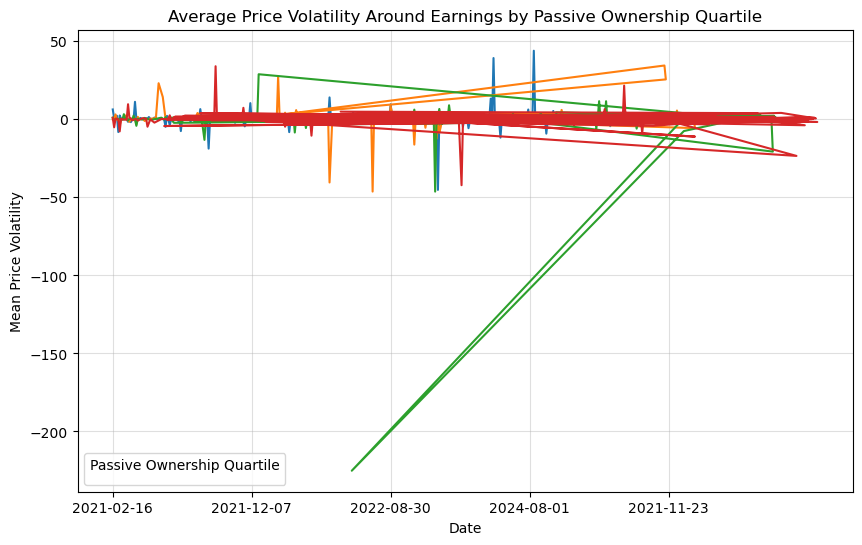

In [43]:
plt.figure(figsize=(10,6))
sub1 = avg_PJ_ar1[avg_PJ_ar1['passive_q'] == 1]
plt.plot(sub1['Date'], sub1['PJ_ar1'])
sub2 = avg_PJ_ar1[avg_PJ_ar1['passive_q'] == 2]
plt.plot(sub2['Date'], sub2['PJ_ar1'])
sub3 = avg_PJ_ar1[avg_PJ_ar1['passive_q'] == 3]
plt.plot(sub3['Date'], sub3['PJ_ar1'])
sub4 = avg_PJ_ar1[avg_PJ_ar1['passive_q'] == 4]
plt.plot(sub4['Date'], sub4['PJ_ar1'])

plt.title('Average Price Volatility Around Earnings by Passive Ownership Quartile')
plt.xlabel('Date')
plt.ylabel('Mean Price Volatility')
plt.legend(title='Passive Ownership Quartile')
plt.grid(True, alpha = 0.4)
plt.xticks(np.arange(0, 500, step=100))
plt.show()

([<matplotlib.axis.XTick at 0x1215f0690>,
 [Text(0, 0, '2021-02-16'),
  Text(100, 0, '2021-12-07'),
  Text(200, 0, '2022-08-30'),
  Text(300, 0, '2024-08-01'),
  Text(400, 0, '')])

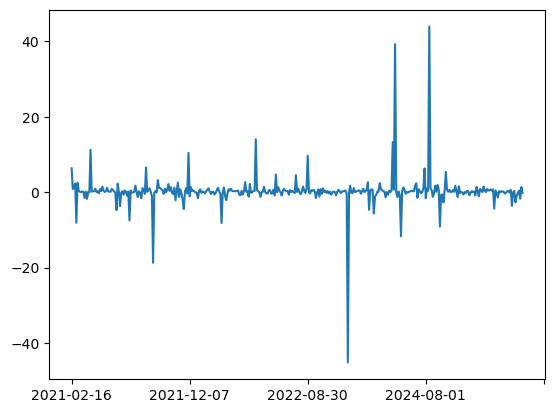

In [44]:
sub = avg_PJ_ar1[avg_PJ_ar1['passive_q'] == 1]
plt.plot(sub['Date'], sub['PJ_ar1'])
plt.xticks(np.arange(0, 500, step=100))